# Social Media Analytics HW 1



1.   Shubhada Kapre (sk55489)
2.   Parthiv Borgohain (pb25347)
3.   James Anderson (ja47823)
4.   Saurabh Arora (sa55445)
5.   Rishabh Tiwari (rt27739)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

First let us read the training dataset

In [3]:
df_original = pd.read_csv('train.csv')
df_original.head(5)

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


Let us transform the dataframe to include A-B variables as suggested in the prompt.

In [4]:
A_columns = []
B_columns = []
#Splitting columns into A and B columns for easier processing

for i in df_original.columns.values:
    if 'A' in i:
        A_columns.append(i)
        
    elif 'B' in i:
        B_columns.append(i)
    else:
        continue
        
df_A = df_original[A_columns]
df_A.columns = df_A.columns.str.replace('A','A-B')
df_B = df_original[B_columns]
df_B.columns = df_B.columns.str.replace('B','A-B')

#Creating a dataframe A-B
df = df_A - df_B
df

,A-B_follower_count,A-B_following_count,A-B_listed_count,A-B_mentions_received,A-B_retweets_received,A-B_mentions_sent,A-B_retweets_sent,A-B_posts,A-B_network_feature_1,A-B_network_feature_2,A-B_network_feature_3
0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036
...,...,...,...,...,...,...,...,...,...,...,...
5495,-762629,-1185,-13787,-5351.839938,-4730.783795,54.126383,3.006633,86.017644,-20651,28.807054,2171.964468
5496,-682,-236,-3,1.139100,-0.205570,0.000000,0.000000,-1.018804,4,47.600000,-3554.800000
5497,7831,-1038,566,34.391680,18.740284,0.181576,-0.777790,1.940731,117,103.995098,1292.989740
5498,-57424,-37392,-21681,455.382230,415.318328,-1.388242,-1.244570,3.138261,1907,-230.511754,-6661.772353


Now let us normalize this dataset by using MinMaxScaler



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Normalizing A-B dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
Y = df_original['Choice']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=15, stratify=Y)

## Random Forest Model

Let us try to compute the feature importances in our data by using a Random Forest Classifier as it can directly output variable importances

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
clf = rf.fit(X_train, Y_train)
Y_pred_rf = clf.predict(X_validation)

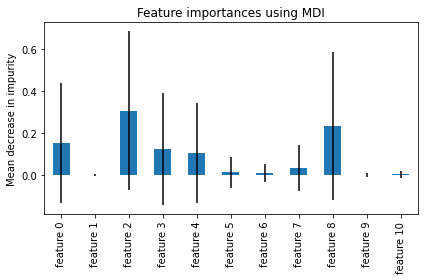

In [8]:
import matplotlib.pyplot as plt

feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

From the graph, we conclude that feature 1, feature 6 and feature 9 have little to no significance.

However, we will train the model with all the variables anyways. Even if they have little significance, they won't have big weights allocated to them.

In [15]:
from sklearn.metrics import accuracy_score
# score1 = accuracy_score(Y_validation2, Y_pred2)
# print("The mlp classifier with 16 features returns an accuracy of", score1)
score2 = accuracy_score(Y_validation, Y_pred_rf)
print("The rf classifier returns an accuracy of", score2)

The rf classifier returns an accuracy of 0.7581818181818182


## Multi Layer Perceptron (MLP) Model

Let us try to do some hyperparameter tuning using a MLP Classifier as it is a fairly good classifier and try to compute its accuracy on a validation set.

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['lbfgs','sgd', 'adam'], 'max_iter': [1000,1500,2000], 'alpha': 10.0 ** -np.arange(1, 4), 'hidden_layer_sizes':np.arange(10, 15)}

mlp_clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1,verbose=3)

mlp_clf.fit(X_train,Y_train)

print(mlp_clf.best_params_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
{'alpha': 0.1, 'hidden_layer_sizes': 12, 'max_iter': 2000, 'solver': 'lbfgs'}


In [10]:
import pickle
import joblib

#Let us try to save this model so that we don't have to load it again and again.
filename = 'finalized_mlp_model.pkl'
filename = joblib.dump(mlp_clf, filename)

In [13]:
from sklearn.metrics import classification_report,accuracy_score
Y_pred = mlp_clf.predict(X_validation)
print("Accuracy Score for MLP Classifier is-")
accuracy_score(Y_validation, Y_pred)

Accuracy Score for MLP Classifier is-


0.7354545454545455

In [14]:
print("Classification Summary is-")
print(classification_report(Y_validation, Y_pred))

Classification Summary is-
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       540
           1       0.73      0.75      0.74       560

    accuracy                           0.74      1100
   macro avg       0.74      0.74      0.74      1100
weighted avg       0.74      0.74      0.74      1100



Confusion Matrix for MLP Classifier is-


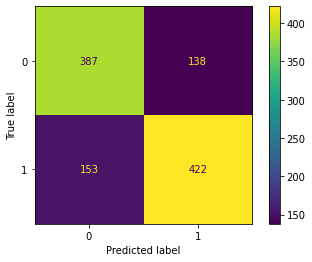

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf_mlp_matrix = confusion_matrix(Y_pred,Y_validation)
print("Confusion Matrix for MLP Classifier is-")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mlp_matrix,display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

(I used the mlp classifier before doing this)

## Logistic Regression for Relative Importance

Now let us fit a Logistic Regression Model to get variable importance. We can then use the coefficient values for the different features in Part II of the HW.

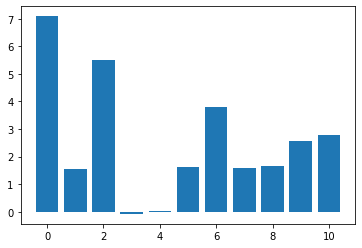

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train) # need to specify which training set to use
importance = model.coef_[0]

# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
feature_names = df.columns.values 
importance1 = list(importance)
print(pd.DataFrame(list(zip(feature_names,importance1)), columns=['Feature','Importance']).sort_values(by='Importance',ascending=False))

                  Feature  Importance
0      A-B_follower_count    7.092293
2        A-B_listed_count    5.518611
6       A-B_retweets_sent    3.789891
10  A-B_network_feature_3    2.794763
9   A-B_network_feature_2    2.571194
8   A-B_network_feature_1    1.654815
5       A-B_mentions_sent    1.606908
7               A-B_posts    1.596771
1     A-B_following_count    1.548155
4   A-B_retweets_received    0.020346
3   A-B_mentions_received   -0.079447


### Conclusion for this Part:

We will be using these coefficient values in Part 2 to assign the scores to each individual user. Clearly, the A-B Follower Count, A-B Listed Count, A-B Retweets Sent and the 3 network features seem to be the most impactful predictors in influence as per our Logistic Regression Model.

Our findings suggest that for a given class (A or B), a higher likelihood of being an influencer is associated with a larger number of followers, a larger listed count and larger retweets sent. This information could prove incredibly valuable for social media teams as it can help them identify key users to target in an affiliate marketing program. The team could gather a list of users on Twitter who mentioned their firm and then utilize a predictive model like the one described to determine which users to offer compensation for participating in the marketing program.

Additionally, the notion that a higher number of followers and retweets indicate increased engagement and a higher likelihood of being an influencer aligns with conventional wisdom. However, the prominence of the listed count attribute warrants further examination. This attribute measures the number of public lists the user is included in, which is essentially a curated list of accounts compiled by other users. Therefore, this attribute being impactful on a user's influencer status is also reasonable, as it demonstrates the user being viewed as a noteworthy account by others.

## Financial Value of Analytical Model

These are the given conditions in the prompt-

In [21]:
profit_margin = 10
payout = 5
payout_analytics = 10
prob_infl = 0.0001
prob_infl2 = 0.00015

In [22]:
df2 = scaler.fit_transform(df)
df3 = df2.tolist()

predictions = []
for i in df3:
    prediction = mlp_clf.predict(np.array(i).reshape((1,-1))) #Using Random Forest Classifier to predict
    predictions.append(prediction)
    
df['predictions']=predictions
len(df)

5500

In [23]:
df.to_csv('predictedinfluence.csv')

In [24]:
df=pd.read_csv('predictedinfluence.csv')
df=df[['predictions']]
df = pd.merge(df_original, df, left_index=True, right_index=True)
df = df[['Choice','predictions','A_follower_count','B_follower_count']]
df=df.rename(columns={'Choice': 'Actual', 'predictions': 'Predicted'})

def convert_int(X):
  return int(X[1])

df['Predicted'] = df['Predicted'].map(convert_int)

df.head()

,Actual,Predicted,A_follower_count,B_follower_count
0,0,0,228,34463
1,0,1,21591,39262
2,0,1,7310,3622
3,0,0,20,19562
4,1,1,45589,7554


In [25]:
df['Accurate'] = (df['Actual']==df['Predicted'])
df['Profit without Analytics'] = (df['Actual']*df['A_follower_count']*prob_infl*profit_margin)+(abs(1-df['Actual'])*df['B_follower_count']*prob_infl*profit_margin)-(payout*2)

#Function to return profits if we use our model
def profit_analytics(pred,accurate,a_f, b_f):
    result = []
    for i in range(len(pred)):
        if(pred[i]==1 and accurate[i]==True): # actual influencer A
            pA = (a_f[i] * prob_infl2 * profit_margin) - payout_analytics
            result.append(pA)
        elif(pred[i]==0 and accurate[i]==True): # actual influencer B
            pB = (b_f[i] * prob_infl2 * profit_margin) - payout_analytics
            result.append(pB)
        else: # misclassified
            result.append(-payout_analytics)
    return result

#Function to return profits if we used a perfect analytical model
def profit_perfect_analytics(actual,a_f, b_f):
    result = []
    for i in range(len(actual)):
        if(actual[i]==1):
            pA = (a_f[i] * prob_infl2 * profit_margin) - payout_analytics
            result.append(pA)
        else: # actual influencer B
            pB = (b_f[i] * prob_infl2 * profit_margin) - payout_analytics
            result.append(pB)
    return result

profit_with_perfect_analytics = profit_perfect_analytics(df['Actual'],df['A_follower_count'],df['B_follower_count'])
df['Profit with Perfect Analytics'] = profit_with_perfect_analytics

profit_with_analytics = profit_analytics(df['Predicted'],df['Accurate'],df['A_follower_count'],df['B_follower_count'])
df['Profit with Analytics'] = profit_with_analytics
df

,Actual,Predicted,A_follower_count,B_follower_count,Accurate,Profit without Analytics,Profit with Perfect Analytics,Profit with Analytics
0,0,0,228,34463,True,24.463,41.6945,41.6945
1,0,1,21591,39262,False,29.262,48.8930,-10.0000
2,0,1,7310,3622,False,-6.378,-4.5670,-10.0000
3,0,0,20,19562,True,9.562,19.3430,19.3430
4,1,1,45589,7554,True,35.589,58.3835,58.3835
...,...,...,...,...,...,...,...,...
5495,0,0,41765,804394,True,794.394,1196.5910,1196.5910
5496,1,1,112,794,True,-9.888,-9.8320,-9.8320
5497,0,0,15385,7554,True,-2.446,1.3310,1.3310
5498,0,0,265258,322682,True,312.682,474.0230,474.0230


In [26]:
print("So, profit without using any analytics is $",sum(df['Profit without Analytics']))
print("So, profit using  analytics is $",sum(df['Profit with Analytics']))
print("So, profit using perfect analytics is $",sum(df['Profit with Perfect Analytics']))

print("\n\nSo lift in profit after using analytics is:",sum(df['Profit with Analytics']/sum(df['Profit without Analytics'])))
print("\n\nSo lift in profit if we use perfect analytics is:",sum(df['Profit with Perfect Analytics']/sum(df['Profit without Analytics'])))

So, profit without using any analytics is $ 5321568.592999984
So, profit using  analytics is $ 7260944.694499998
So, profit using perfect analytics is $ 8009852.889499992


So lift in profit after using analytics is: 1.3644369263700358


So lift in profit if we use perfect analytics is: 1.5051676492596848


### Conculsion for Financial Value of our Analytical Model

The utilization of analytics has proven to be highly profitable, as demonstrated by the significant lift of **36.44%** in profit observed compared to using no analytics. This offers a valuable opportunity for companies to optimize their marketing efforts by using our model to specifically target paid influencers, instead of a blanket approach of paying every user for influencer advertising. While an even greater lift of **50.52%** in profits is attainable with a perfect analytical model, this level of accuracy is not realistically achievable in the real world, as no model can flawlessly classify a Twitter user as an influencer or non-influencer.

## Twitter Scraping + Network Metric Calculations

First we will Scrape tweets for the hashtag **#NFLRigged** from the Twitter API using Tweepy.

In [27]:
import tweepy

In [ ]:
consumer_key = 'XN4UTQPjpxxtWc4WlT5uiWMCk' #Your API/Consumer key 
consumer_secret = 'r3FnIoXcR2oM2w44eWfwOXWZ1LSzFkAbKGVmuD55nXYSr1tnvk' #Your API/Consumer Secret Key
access_token = '970761218821632001-0j98sHzA3tJJTq1ki1keZq4RZwxfAMF'  #Your Access token key
access_token_secret = 'icsSPU4VsuDfCuYXDuDVNaTvbsmYROg2bL28gooQUkfdv' #Your Access token Secret key


#Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)

tweets_df = pd.DataFrame(columns=["Id", "Date Created", "Number of Likes", "Source of Tweet", "Tweet", "Followers", "Following", "Retweet Count"])
search_query = "#NFLRigged"
no_of_tweets = 5000

for i in range(50):
    try:
    #The number of tweets we want to retrieved from the search
        tweets = api.search_tweets(q=search_query, count=no_of_tweets)

    #Pulling Some attributes from the tweet
        attributes_container = [[tweet.user.screen_name, tweet.created_at, tweet.favorite_count, tweet.source,  tweet.text,  
                                 tweet.user.followers_count, tweet.user.friends_count, tweet.retweet_count] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
        columns = ["Id", "Date Created", "Number of Likes", "Source of Tweet", "Tweet", "Followers", "Following", "Retweet Count"]

    #Creation of Dataframe
        tweets100 = pd.DataFrame(attributes_container, columns=columns)
        tweets_df = tweets_df.append(tweets100)
    except BaseException as e:
        print('Status Failed On,',str(e))

C:\Users\prasu\AppData\Local\Temp\ipykernel_16360\823913501.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(tweets100)
C:\Users\prasu\AppData\Local\Temp\ipykernel_16360\823913501.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(tweets100)
C:\Users\prasu\AppData\Local\Temp\ipykernel_16360\823913501.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(tweets100)
C:\Users\prasu\AppData\Local\Temp\ipykernel_16360\823913501.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(tweets100)
C:\Users\prasu\AppData\Local\Tem

In [ ]:
tweets_df.to_csv('nflrigged.csv')

In [28]:
tweets_df=pd.read_csv('nflrigged.csv') #in case we have to run it again in a different runtime
tweets_df =tweets_df.drop('Unnamed: 0',axis=1)
is_retweet = []
for i in tweets_df['Tweet']:
    if i.startswith("RT"):
        is_retweet.append("RT")
    else:
        is_retweet.append("Tweet")

tweets_df['is_retweet'] = is_retweet

In [29]:
is_mention = []
for i in tweets_df['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df['is_mention'] = is_mention

tweets_df.head()

,Id,Date Created,Number of Likes,Source of Tweet,Tweet,Followers,Following,Retweet Count,is_retweet,is_mention
0,jayspartan20,2023-02-03 00:08:05+00:00,0,Twitter for iPhone,RT @MasterAtWorkinc: This was on Draft Kings s...,68,104,2,RT,0
1,poopydicknick,2023-02-03 00:02:38+00:00,1,Twitter Web App,"Calm down folks, he's just following the NFL s...",362,792,0,Tweet,0
2,Layne__w,2023-02-03 00:02:35+00:00,0,Twitter for iPhone,RT @FormerNFLFan789: Two years in a row!!!! Fa...,1940,3247,13,RT,0
3,texaskid4life,2023-02-03 00:01:58+00:00,0,Twitter Web App,RT @MasterAtWorkinc: This was on Draft Kings s...,465,543,2,RT,0
4,MasterAtWorkinc,2023-02-03 00:01:22+00:00,5,Twitter Web App,This was on Draft Kings sports book during liv...,2056,384,2,Tweet,0


In [ ]:
is_mention = []
for i in tweets_df['Tweet']:
    if "@" in i and i.startswith("RT") == False:
        is_mention.append("Mention")
    else:
        is_mention.append("0")

tweets_df['is_mention'] = is_mention

In [30]:
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'@\w+')
tweets_df['Words'] = tweets_df['Tweet'].apply(lambda x: tokenizer.tokenize(x))

In [34]:
tweets_df = tweets_df.explode('Words')

tweet_identity = []
for i in range(len(tweets_df['is_mention'])):
    if tweets_df.iloc[i]['is_mention'] == "Mention":
        tweet_identity.append("Mention")
    else:
        tweet_identity.append(tweets_df.iloc[i]['is_retweet'])

tweets_df['tweet_identity'] = tweet_identity
df4 = tweets_df.drop(['Date Created','Number of Likes', 'is_retweet','is_mention','Tweet','Source of Tweet'], axis=1)

In [35]:
df4 = df4.rename(columns={df4.columns[1]: 'target'})
df4['target'] = df4['target'].fillna(df4['Id'])

df4.head()

,Id,target,Following,Retweet Count,Words,tweet_identity
0,jayspartan20,68,104,2,@MasterAtWorkinc,RT
1,poopydicknick,362,792,0,NaN,Tweet
2,Layne__w,1940,3247,13,@FormerNFLFan789,RT
3,texaskid4life,465,543,2,@MasterAtWorkinc,RT
4,MasterAtWorkinc,2056,384,2,NaN,Tweet


In [36]:
import networkx as nx

In [37]:
# Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df4, source="Id", target="target")
G

In [38]:
list(G.degree())

[('jayspartan20', 1),
 (68, 1),
 ('poopydicknick', 1),
 (362, 1),
 ('Layne__w', 1),
 (1940, 1),
 ('texaskid4life', 1),
 (465, 1),
 ('MasterAtWorkinc', 1),
 (2056, 1),
 ('floydianship', 1),
 (687, 1),
 ('BornCincyFan', 1),
 (6, 2),
 ('PropMclaughlin_', 1),
 (24, 1),
 ('THE_GRAYF0X', 1),
 (182, 1),
 ('NoDiiscussiion', 1),
 (69, 1),
 ('Pqranold', 1),
 (230, 1),
 ('EBainbridge26', 1),
 (363, 1),
 ('WTFinSoCal', 1),
 (257, 1),
 ('FormerNFLFan789', 1),
 (626, 1),
 ('GabrielNgansi', 1),
 (43, 1),
 ('jackihillis22', 1),
 (120, 1),
 ('if_tesla', 1),
 (13, 1),
 ('KecksterFal', 1),
 (417, 1),
 ('SkylerBertram1', 1),
 (1, 2),
 ('RicoMuscatel', 1),
 (2029, 1),
 ('EspressoJose', 1),
 (20, 1),
 ('thetadrivium', 1),
 (105, 1),
 ('Jan11555', 1),
 (2, 2),
 ('plingon11', 1),
 (160, 1),
 ('SpadedLord', 1),
 ('IfItHasAScore', 1),
 (1046, 1),
 ('Dwheel_14', 1),
 (14, 1),
 ('ubok1978', 1),
 (198, 1),
 ('Viyapoo', 1),
 (292, 1),
 ('punkrockdub', 1),
 (56, 1),
 ('Lvnd00', 1),
 (175, 1),
 ('Luke_Neitzke', 1),
 

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
degree_centrality = nx.degree_centrality(G) 
# I believe this is normalizing to fit values between 0 and 1

### Plotting of Network using NetworkX

Let us plot the network graph now.

In [52]:
def strip_at(X):
  if type(X) is str:
   return X.lstrip('@')
  else:
    return np.nan
df5=df4.copy()  
df5['Words']=df5['Words'].map(strip_at)
df5 = df5[['Id','Words','tweet_identity']]
df5=df5.rename(columns={'Id':'Id1','Words':'Id2','tweet_identity':'Interaction'})
df5 = df5[df5['Id2'].notna()]
df5.to_csv('network_nodes.csv')
df5

,Id1,Id2,Interaction
0,jayspartan20,MasterAtWorkinc,RT
2,Layne__w,FormerNFLFan789,RT
3,texaskid4life,MasterAtWorkinc,RT
6,floydianship,MasterAtWorkinc,RT
7,BornCincyFan,nflcommish,Mention
...,...,...,...
4996,cinbengalsJB9,Cromezn,RT
4997,DonBrow77958233,NFL,Mention
4997,DonBrow77958233,TomBrady,Mention
4998,cinbengalsJB9,curtisxu,RT


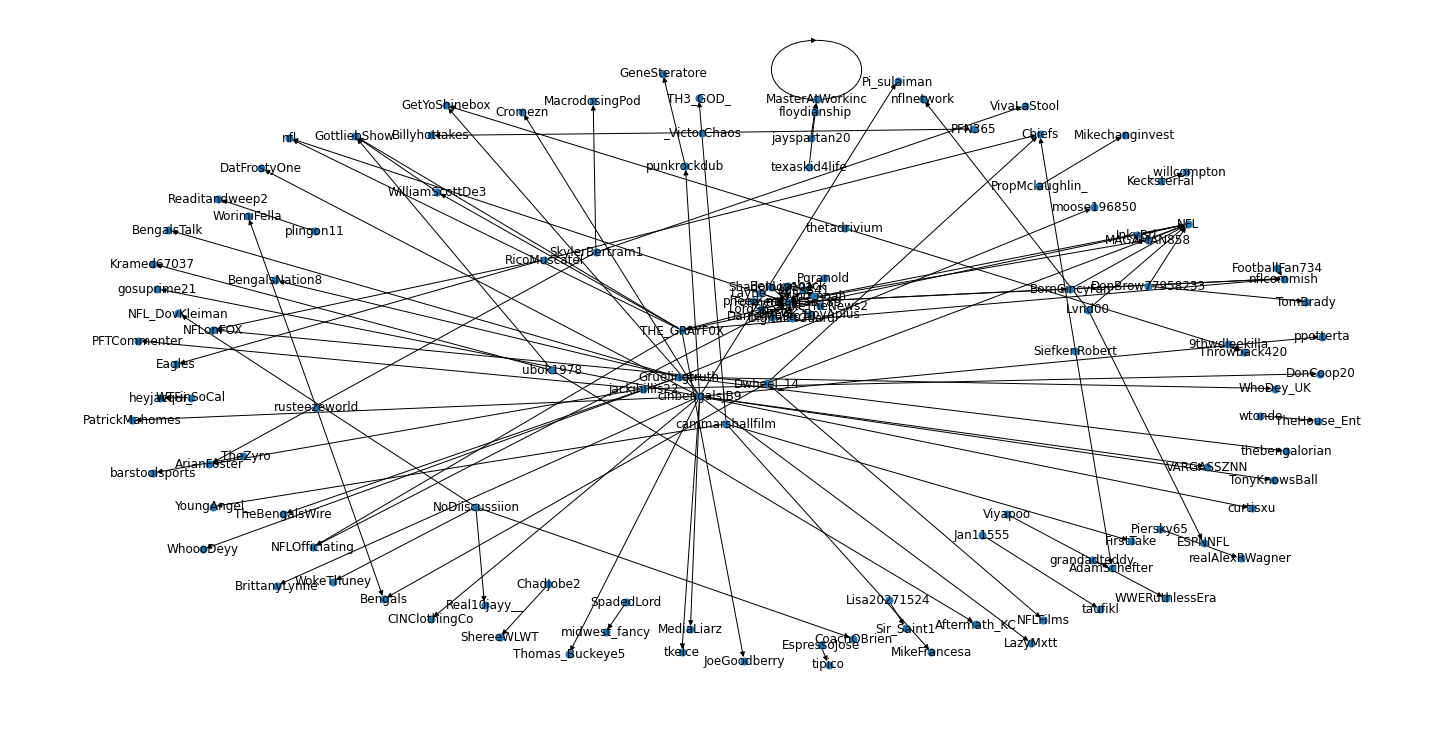

In [53]:
# create network with NetworkX
df5['Nodes'] = df5[['Id1', 'Id2']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(df5['Nodes'])


plt.figure(figsize = (20, 10))
nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()


Now that the graph is plotted, we will continue with our calculation of network metrics

In [ ]:
|btw_cent = pd.DataFrame(betweenness_centrality.items(), columns=['User', 'Betweenness'])
cls_cent = pd.DataFrame(closeness_centrality.items(), columns=['User', 'Closeness'])
deg_cent = pd.DataFrame(degree_centrality.items(), columns=['User', 'Degree'])

In [ ]:
merge1 = btw_cent.merge(deg_cent)
merge2 = merge1.merge(cls_cent)
merge2

,User,Betweenness,Degree,Closeness
0,TheGilbertCruz,0.00000,0.005917,0.005917
1,761,0.00000,0.005917,0.005917
2,rjq2Cvnk8LXG1hJ,0.00000,0.005917,0.007890
3,88,0.00007,0.011834,0.011834
4,_otomatic,0.00000,0.005917,0.005917
...,...,...,...,...
165,4876407,0.00000,0.005917,0.016437
166,fh4GLu7UHmjnSQs,0.00000,0.005917,0.007890
167,4876408,0.00000,0.005917,0.016437
168,4876409,0.00000,0.005917,0.016437


## Running the Twitter data through Model from part 1

In [ ]:
tweets_df

,Id,Date Created,Number of Likes,Source of Tweet,Tweet,Followers,Following,Retweet Count,is_retweet,is_mention,Words,tweet_identity
0,TheGilbertCruz,2023-02-04 00:36:27+00:00,0,Twitter for iPhone,RT @barstoolsports: The players get the script...,761,655,53,RT,0,@barstoolsports,RT
1,rjq2Cvnk8LXG1hJ,2023-02-04 00:33:36+00:00,0,TweetDeck,RT @barstoolsports: The players get the script...,88,316,53,RT,0,@barstoolsports,RT
2,_otomatic,2023-02-04 00:33:16+00:00,0,Twitter for iPhone,RT @barstoolsports: The players get the script...,30,84,53,RT,0,@barstoolsports,RT
3,COIPN8iVybaipbC,2023-02-04 00:33:00+00:00,0,TweetDeck,RT @barstoolsports: The players get the script...,88,347,53,RT,0,@barstoolsports,RT
4,bruce_wayne_jk,2023-02-04 00:32:46+00:00,0,Twitter for Android,RT @barstoolsports: The players get the script...,145,343,53,RT,0,@barstoolsports,RT
...,...,...,...,...,...,...,...,...,...,...,...,...
95,ehainline76,2023-02-03 14:41:15+00:00,0,Twitter for iPhone,@Oyabungaijin @FOXSports Carl Cheffers….the Ch...,45,137,0,Tweet,Mention,@FOXSports,Mention
96,FormerNFLFan789,2023-02-03 14:18:00+00:00,0,Twitter for Android,RT @Jeff88028836: Funny how they lose there be...,654,224,2,RT,0,@Jeff88028836,RT
97,USNRetired1998,2023-02-03 14:00:15+00:00,1,Twitter for iPhone,@NFL 2023 AFC Title game was the most one side...,49,67,0,Tweet,Mention,@NFL,Mention
98,brian_shall,2023-02-03 13:58:38+00:00,0,Twitter for iPhone,#NFLRigged https://t.co/RsetVxkjoz,189,582,0,Tweet,0,NaN,Tweet


In [ ]:
user_list = list(set(list(tweets_df['Id'].drop_duplicates().values)))
len(user_list)

87

In [ ]:
metrics = tweets_df[['Id','Number of Likes','Followers','Following','Retweet Count','is_retweet','is_mention']]

In [ ]:
metrics

,Id,Number of Likes,Followers,Following,Retweet Count,is_retweet,is_mention
0,TheGilbertCruz,0,761,655,53,RT,0
1,rjq2Cvnk8LXG1hJ,0,88,316,53,RT,0
2,_otomatic,0,30,84,53,RT,0
3,COIPN8iVybaipbC,0,88,347,53,RT,0
4,bruce_wayne_jk,0,145,343,53,RT,0
...,...,...,...,...,...,...,...
95,ehainline76,0,45,137,0,Tweet,Mention
96,FormerNFLFan789,0,654,224,2,RT,0
97,USNRetired1998,1,49,67,0,Tweet,Mention
98,brian_shall,0,189,582,0,Tweet,0


In [ ]:
metrics['is_retweet'] = metrics['is_retweet'].replace(['Tweet'], 0)
metrics['is_retweet'] = metrics['is_retweet'].replace(['RT'], 1)
metrics['is_mention'] = metrics['is_mention'].replace(['Mention'], 1)
metrics['is_retweet'] = metrics['is_retweet'].astype('int')
metrics['is_mention'] = metrics['is_mention'].astype('int')
metrics['Number of Likes'] = metrics['Number of Likes'].astype('int')
metrics['Followers'] = metrics['Followers'].astype('int')
metrics['Following'] = metrics['Following'].astype('int')
metrics['Retweet Count'] = metrics['Retweet Count'].astype('int')

C:\Users\prasu\AppData\Local\Temp\ipykernel_16360\3153493009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['is_retweet'] = metrics['is_retweet'].replace(['Tweet'], 0)
C:\Users\prasu\AppData\Local\Temp\ipykernel_16360\3153493009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['is_retweet'] = metrics['is_retweet'].replace(['RT'], 1)
C:\Users\prasu\AppData\Local\Temp\ipykernel_16360\3153493009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
metrics.groupby('Id').sum().reset_index()

,Id,Number of Likes,Followers,Following,Retweet Count,is_retweet,is_mention
0,10k__gold,0,2137050,2274350,2600,50,0
1,3vzSdRKpHVqHTzN,0,450,3550,2684,50,0
2,AlexDesai27,0,4100,4450,2684,50,0
3,AlvinHomen,0,2650,15500,2684,50,0
4,AndreaO46228499,0,500,600,4600,50,0
...,...,...,...,...,...,...,...
82,spitfire_18,0,26850,15000,2684,50,0
83,stylesdecodes,0,850,1450,0,0,0
84,t9nerr,0,1450,26650,2684,50,0
85,thesadfancast,0,5700,16600,0,0,0


In [ ]:
df_users = metrics.merge(merge2, left_on = 'Id', right_on = 'User')
df_users = df_users.drop(['User','Number of Likes'], axis=1)

In [ ]:
df_users = df_users.drop_duplicates()
df_users

,Users,follower_count,following_count,retweets_sent,retweets_received,mentions_received,network_feature_1,network_feature_2,network_feature_3
0,TheGilbertCruz,761,655,53,1,0,0.0,0.005917,0.005917
8,TheGilbertCruz,761,655,54,1,0,0.0,0.005917,0.005917
50,rjq2Cvnk8LXG1hJ,88,316,53,1,0,0.0,0.005917,0.007890
58,rjq2Cvnk8LXG1hJ,88,316,54,1,0,0.0,0.005917,0.007890
100,_otomatic,30,84,53,1,0,0.0,0.005917,0.005917
...,...,...,...,...,...,...,...,...,...
6400,brian_shall,189,582,0,0,0,0.0,0.005917,0.005917
6450,10k__gold,42741,45487,52,1,0,0.0,0.005917,0.005917
6500,ThoughtsCovid,155,391,0,0,0,0.0,0.005917,0.005917
6508,fh4GLu7UHmjnSQs,103,443,54,1,0,0.0,0.005917,0.007890


In [ ]:
len(df_users['Users'].unique())

87

In [ ]:
df_users = df_users.groupby('Users').sum().reset_index()
df_users

,Users,follower_count,following_count,retweets_sent,retweets_received,mentions_received,network_feature_1,network_feature_2,network_feature_3
0,10k__gold,42741,45487,52,1,0,0.0,0.005917,0.005917
1,3vzSdRKpHVqHTzN,18,142,107,2,0,0.0,0.011834,0.011834
2,AlexDesai27,164,178,107,2,0,0.0,0.011834,0.011834
3,AlvinHomen,106,620,107,2,0,0.0,0.011834,0.011834
4,AndreaO46228499,10,12,92,1,0,0.0,0.005917,0.010651
...,...,...,...,...,...,...,...,...,...
82,spitfire_18,1074,600,107,2,0,0.0,0.011834,0.011834
83,stylesdecodes,17,29,0,0,0,0.0,0.005917,0.005917
84,t9nerr,58,1066,107,2,0,0.0,0.011834,0.011834
85,thesadfancast,114,332,0,0,0,0.0,0.005917,0.007890


In [ ]:
columns_order = ['Users','follower_count','following_count','mentions_received','retweets_received',\
                  'retweets_sent','network_feature_1','network_feature_2','network_feature_3']
df_users = df_users[columns_order]

In [ ]:
features = importance[[0,1,3,4,6,8,9,10]]
features

array([ 7.09229329,  1.54815487, -0.07944707,  0.02034559,  3.78989078,
        1.65481484,  2.5711938 ,  2.79476302])

In [ ]:
df_users_merged = scaler.fit_transform(df_users.iloc[:,1:])
df_top20 = pd.DataFrame(df_users_merged, columns = df_users.iloc[:,1:].columns.values)
df_top20.insert(0, 'Users', df_users['Users'])
df_top20['Influence Score'] = df_users_merged @ features.T
df_top20

,Users,follower_count,following_count,mentions_received,retweets_received,retweets_sent,network_feature_1,network_feature_2,network_feature_3,Influence Score
0,10k__gold,8.764444e-04,1.000000,0.0,0.142857,0.072122,0.0,0.000000,0.000000,1.830612
1,3vzSdRKpHVqHTzN,3.281104e-07,0.003078,0.0,0.285714,0.148405,0.0,0.020408,0.020408,0.682529
2,AlexDesai27,3.322118e-06,0.003869,0.0,0.285714,0.148405,0.0,0.020408,0.020408,0.683775
3,AlvinHomen,2.132718e-06,0.013587,0.0,0.285714,0.148405,0.0,0.020408,0.020408,0.698811
4,AndreaO46228499,1.640552e-07,0.000220,0.0,0.142857,0.127601,0.0,0.000000,0.016327,0.532469
...,...,...,...,...,...,...,...,...,...,...
82,spitfire_18,2.198340e-05,0.013147,0.0,0.285714,0.148405,0.0,0.020408,0.020408,0.698271
83,stylesdecodes,3.076035e-07,0.000594,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000921
84,t9nerr,1.148386e-06,0.023392,0.0,0.285714,0.148405,0.0,0.020408,0.020408,0.713984
85,thesadfancast,2.296773e-06,0.007255,0.0,0.000000,0.000000,0.0,0.000000,0.006803,0.030260


In [ ]:
df_top20[['Users','Influence Score']].sort_values(by = 'Influence Score', ascending = False)[:20]

,Users,Influence Score
60,barstoolsports,17.167380
65,clappincheeks_,3.817560
19,GiesovA,2.661512
0,10k__gold,1.830612
39,SGenneus,1.475270
67,destrade_50,1.018495
79,sauceocho,0.861477
51,YzwkimN1xZURdL1,0.773106
62,browns4the_w,0.766430
12,CrothersDalton,0.755992


## Conclusion

The above table presents the Top 20 Influential Twitter users based on the Influence Score Model computed using the Logistic Regression Model we trained previously. As shown in the table, **@barstoolsports** appears to be the most influential user who participated in the discussion of **#NFLRigged**, which is not surprising considering their vast following of **4.8 million followers**.

In this project, we successfully:

1. Developed an Analytical Model to classify Twitter users as influential or non-influential by training on a Kaggle dataset.

2. Evaluated the financial potential of our model by comparing it to a model that selects all users for paid influencer marketing.

3. Scraped recent tweets on the topic of #NFLRigged and identified the 20 most influential users by computing an influence score based on the coefficients of the Logistic Regression Model.

Overall, our results demonstrate the power of utilizing analytics to uncover the most valuable influencer targets for effective marketing campaigns.
